# Evaluation

In [126]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [127]:
hotel_rev = pd.read_csv('HotelRevHelpfulness.csv')
hotel_rev.head()

,hotelId,aveHelpfulnessRatioUser,stdevHelpfulnessRatioUser,pcReviewsExceedMinHelpfulnessSupport,numReviewsUser,numReviewsHotel,ratingUser,numberSubRatingsUser,subRatingMeanUser,subRatingStdevUser,...,completeness_2,completeness_3,numberTermsEntry,percentageAlphaCharsEntry,fractionUpperCaseCharsEntry,fractionYouVsIEntry,numberTermsSummaryQuote,percentageAlphaCharsSummaryQuote,fractionUpperCaseCharsSummaryQuote,reviewHelpfulness
0,17420,1.000000,0.000000,0.666667,3,16,5,4,4.000000,0.000000,...,0,1,182,0.788474,0.025703,0.500000,6,0.815789,0.096774,1
1,1397,0.772487,0.377321,0.500000,12,233,5,0,0.000000,0.000000,...,0,0,158,0.791888,0.012594,0.500000,1,1.000000,0.083333,1
2,1348,0.715473,0.300437,0.833333,12,302,4,7,3.714286,0.755929,...,0,3,59,0.799639,0.024831,0.333333,4,0.828571,0.034483,0
3,5940,0.521250,0.481675,0.222222,36,6,1,4,1.000000,0.000000,...,0,0,95,0.782212,0.029155,0.500000,2,0.800000,0.062500,0
4,38,0.603175,0.246926,1.000000,2,271,3,0,0.000000,0.000000,...,0,0,43,0.805128,0.028662,0.000000,1,1.000000,0.142857,0


'reviewHelpfulness' is the class label. `1` is positive and `0` is negative.

In [128]:
n = hotel_rev.shape[0]
np = hotel_rev['reviewHelpfulness'].sum()
nn = n - np
print('{} Samples'.format(n))
print('{} Positive \n{} Negative'.format(np,nn))

486 Samples
308 Positive 
178 Negative


In [129]:
y = hotel_rev.pop('reviewHelpfulness').values
Xraw = hotel_rev.values
scaler = StandardScaler()
X = scaler.fit_transform(Xraw)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)
print("X_test shape: ",X_test.shape)

X_test shape:  (162, 24)


In [130]:
mnb = GaussianNB()
hotel_rev_NB = mnb.fit(X_train, y_train)
y_dash = hotel_rev_NB.predict(X_test)

### Accuracy & Confusion Matrix
With the confusion matrix, rows are actual and columns are predicted.   
If 0 is negative and 1 is positive `C(0,0)` is TN and `C(1,1)` is TP.  
TN, FP  
FN, TP


In [131]:
acc = accuracy_score(y_test, y_dash)
print("Accuracy: {0:.2f}".format(acc)) 
confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Accuracy: 0.69
Confusion matrix:
[[42 20]
 [30 70]]


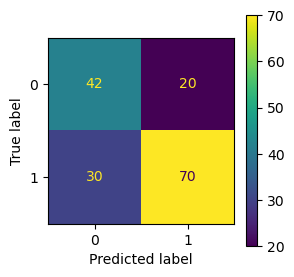

In [132]:
disp = ConfusionMatrixDisplay(confusion)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)

In [133]:
report = classification_report(y_test, y_dash, target_names = ['Not Helpful','Helpful'])
print("Report:\n{}".format(report)) 

Report:
              precision    recall  f1-score   support

 Not Helpful       0.58      0.68      0.63        62
     Helpful       0.78      0.70      0.74       100

    accuracy                           0.69       162
   macro avg       0.68      0.69      0.68       162
weighted avg       0.70      0.69      0.69       162



## SVM

In [134]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear',C=1)
hotel_rev_SVM = svm.fit(X_train, y_train)
y_dash = hotel_rev_SVM.predict(X_test)

In [135]:
acc = accuracy_score(y_test, y_dash)
print("Accuracy: {0:.2f}".format(acc)) 
confusion = confusion_matrix(y_test, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Accuracy: 0.70
Confusion matrix:
[[34 28]
 [21 79]]


In [136]:
report = classification_report(y_test, y_dash, target_names = ['Not Helpful','Helpful'])
print("Report:\n{}".format(report)) 

Report:
              precision    recall  f1-score   support

 Not Helpful       0.62      0.55      0.58        62
     Helpful       0.74      0.79      0.76       100

    accuracy                           0.70       162
   macro avg       0.68      0.67      0.67       162
weighted avg       0.69      0.70      0.69       162



### F1 Measure

In [137]:
from sklearn.metrics import f1_score
kNN = KNeighborsClassifier(n_neighbors=3)  
dtree = DecisionTreeClassifier(criterion='entropy')
mnb = GaussianNB()
models = [mnb,kNN,dtree]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=3, 
                                                    test_size=1/3)
print('F1 Measure')
for m in models:
    mm = m.fit(X_train, y_train)
    y_pred = mm.predict(X_test)
    f1s = f1_score(y_test, y_pred) 
    print("F1 Score on Test set {:22} {:.2f}".format(type(m).__name__, f1s)) 

F1 Measure
F1 Score on Test set GaussianNB             0.75
F1 Score on Test set KNeighborsClassifier   0.72
F1 Score on Test set DecisionTreeClassifier 0.70


## Cross Validation
`cross_val_score` will run a k-fold cross validation.  
Using 4-fold cross validation because my machine has 4 threads (2 cores) and multiple cores are used on the SVM evaluation.  
5-fold X-Val effectively doubles processing time. 

In [139]:
from sklearn.model_selection import cross_val_score
mnb = GaussianNB()
scores = cross_val_score(mnb, X, y, cv=4)
print("4x CV Accuracy Naive Bayes: {0:.2f}".format(scores.mean())) 
scores

4x CV Accuracy Naive Bayes: 0.64


array([0.53278689, 0.66393443, 0.67768595, 0.68595041])

In [140]:
kNN = KNeighborsClassifier(n_neighbors=3)  
kNN_scores = cross_val_score(kNN, X, y, cv=4)
print("4x CV Accuracy kNNs: {0:.2f}".format(kNN_scores.mean())) 
kNN_scores


4x CV Accuracy kNNs: 0.64


array([0.58196721, 0.60655738, 0.69421488, 0.67768595])

In [141]:
dtree = DecisionTreeClassifier(criterion='entropy')
tree_scores = cross_val_score(dtree, X, y, cv=4)
print("4x CV Accuracy Trees: {0:.2f}".format(tree_scores.mean())) 
tree_scores

4x CV Accuracy Trees: 0.70


array([0.69672131, 0.68032787, 0.71900826, 0.7107438 ])

In [142]:
# n_jobs = -1 uses all available threads
from sklearn.svm import SVC
svm = SVC(kernel = 'linear',C=1)
svm_scores = cross_val_score(svm, X, y, cv=4, verbose = 0,  n_jobs = -1)
print("4x CV Accuracy SVMs: {0:.2f}".format(svm_scores.mean())) 
svm_scores

4x CV Accuracy SVMs: 0.72


array([0.68032787, 0.71311475, 0.76859504, 0.7107438 ])

SVC wins with 70% accuracy.  
DTrees come in second with 67%.  
k-NN is last at 63%

### F1 Score
A balanced score that measures the harmonic mean between Precision and Recall.

In [143]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear',C=1)

In [144]:
models = [mnb,kNN,dtree,svm]
# models = [mnb,kNN,dtree]    # leave out svm, life is too short...
folds = 4

In [145]:
print('F1 Measure')
for m in models:
    f1_scores = cross_val_score(m, X, y, cv=folds, scoring = 'f1', n_jobs=-1, verbose = 5)
    print("{} x CV {:22} {:.2f}".format(folds, type(m).__name__, f1_scores.mean())) 

F1 Measure
4 x CV GaussianNB             0.71


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


4 x CV KNeighborsClassifier   0.73
4 x CV DecisionTreeClassifier 0.75


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


4 x CV SVC                    0.79


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


SVM still wins on F1 score. 

## Precision & Recall

In [146]:
print('Precision')
for m in models:
    f1_scores = cross_val_score(m, X, y, cv=folds, scoring = 'precision', n_jobs=-1, verbose = 5)
    print("{} x CV {:22} {:.2f}".format(folds, type(m).__name__, f1_scores.mean())) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


Precision
4 x CV GaussianNB             0.72


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


4 x CV KNeighborsClassifier   0.70


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


4 x CV DecisionTreeClassifier 0.77
4 x CV SVC                    0.74


In [147]:
print('Recall')
for m in models:
    f1_scores = cross_val_score(m, X, y, cv=folds, scoring = 'recall', n_jobs=-1, verbose = 5)
    print("{} x CV {:22} {:.2f}".format(folds, type(m).__name__, f1_scores.mean())) 

Recall
4 x CV GaussianNB             0.71
4 x CV KNeighborsClassifier   0.76


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


4 x CV DecisionTreeClassifier 0.72
4 x CV SVC                    0.86


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


### ROC AUC analysis

In [148]:
folds = 4
print('ROC Analysis')
for m in models:
    roc_scores = cross_val_score(m, X, y, cv=folds, scoring = 'roc_auc', n_jobs=-1)
    print("{} x CV {:22} {:.2f}".format(folds, type(m).__name__, roc_scores.mean())) 

ROC Analysis
4 x CV GaussianNB             0.69
4 x CV KNeighborsClassifier   0.63
4 x CV DecisionTreeClassifier 0.68
4 x CV SVC                    0.75


### Calculating TP & FP with cross validation
The hold out validation shows that SVM has a very high FP rate. It has a strong bias towards the majority class (Helpful).   
Here we get a cross-validation estimate of this FP rate.  
To do this we have to make a scorer function to get the FP scores. 

In [149]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

models = [mnb,kNN,dtree,svm]
# models = [mnb,kNN,dtree]

folds = 4
v = 0 #  use 1 or 0

In [150]:
for m in models:
    cv_results = cross_validate(m, X, y, cv= folds,scoring=scoring, return_train_score=False, 
                                    verbose = v, n_jobs = -1)
    fp_rate = cv_results['test_fp'].sum()/(cv_results['test_fp'].sum()+cv_results['test_tn'].sum())
    tp_rate = cv_results['test_tp'].sum()/(cv_results['test_tp'].sum()+cv_results['test_fn'].sum())
  
    print("{} x CV {:22} FP: {:.2f}  TP: {:.2f}".format(folds, type(m).__name__, fp_rate, tp_rate)) 


4 x CV GaussianNB             FP: 0.48  TP: 0.71
4 x CV KNeighborsClassifier   FP: 0.57  TP: 0.76
4 x CV DecisionTreeClassifier FP: 0.38  TP: 0.75
4 x CV SVC                    FP: 0.53  TP: 0.86


The one score SVM does not win on is the FP rate. This is because it has a strong positive bias. 